In [86]:
import pandas as pd
import numpy as np

In [87]:
df=pd.read_csv('/Users/sriramreddy/Downloads/ML/2_python/all', sep=',',header=None)
df = df.drop(0, axis=1)
df.head()

,1,2,3,4,5,6,7,8,9,10,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,3000
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
df.as_matrix()
df=df.T
C=df.shape

In [89]:
df.shape
#df = df[df.line_race != 0]
# For removing some of the stuff
# import seaborn as sns

(3000, 10000)

In [26]:
# df.as_matrix(columns=None)
# df = df.values
# df = df.drop(['B', 'C'], axis=1)
# df.as_matrix()
# The above statement will automatically provides the numpy array

In [141]:
output=pd.read_csv('/Users/sriramreddy/Downloads/ML/2_python/all_label', sep=',',header=None)
Y_b = output.drop(0, axis=1)
# Y_b.as_matrix()
Y_b=Y_b.values
print(Y_b.shape,Y_b[0],type(Y_b))

(10000, 1) [85] <class 'numpy.ndarray'>


In [91]:
B=output.shape



In [92]:
N=B[0]
K=C[0]
zero_K=np.zeros((K,1))
zero_K.shape
zero_t=np.zeros((1,K+1))
zero_t.shape
I_k=np.eye(K)

In [93]:
# I_b=[I_k,zero_K;zero_t,0] This can't be allowed in Python
# P= np.vstack((I_k,zero_K.T))
print(I_k.shape)
print(zero_t.shape,zero_K.shape)

(3000, 3000)
(1, 3001) (3000, 1)


In [97]:
I= np.hstack((I_k,zero_K))
print(P.shape,zero_t.shape)
I=np.vstack((I,zero_t))

(3001, 3001) (1, 3001)


In [98]:
I

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [99]:
I.shape



(3001, 3001)

In [100]:
X_b=np.vstack((df,np.ones((1,N))))

In [101]:
X_b.shape

(3001, 10000)

In [142]:
X_p=X_b@X_b.T
d=X_b@Y

VD=pd.read_csv('/Users/sriramreddy/Downloads/ML/2_python/valData.csv', sep=',',header=None)
VD = VD.drop(0, axis=1)
VD.as_matrix()
VD=VD.T
size_vd=VD.shape
size_vd1=size_vd[1]
print("VD.shape,size_vd1",VD.shape,size_vd1)
VD_b=np.vstack((VD,np.ones((1,size_vd1)) ))

VL=pd.read_csv('/Users/sriramreddy/Downloads/ML/2_python/valLabels.csv', sep=',',header=None)
VL = VL.drop(0, axis=1)
# VL.as_matrix()
VL=VL.values
print("VL.shape",VL.shape)

TD=pd.read_csv('/Users/sriramreddy/Downloads/ML/2_python/testData.csv', sep=',',header=None)
TD = TD.drop(0, axis=1)
TD.as_matrix()
TD=TD.T
print("TD.shape",TD.shape)
size_vd=TD.shape
size_vd1=size_vd[1]
TD_b=np.vstack((TD,np.ones((1,size_vd1))))

print("Shapes of VDB TDB and VL", VD_b.shape, TD_b.shape, VL.shape)


VD.shape,size_vd1 (3000, 5000) 5000
VL.shape (5000, 1)
TD.shape (3000, 5000)
Shapes of VDB TDB and VL (3001, 5000) (3001, 5000) (5000, 1)


In [201]:
#Processing 
def LOOCV_final(W,C,X,Y):
    total2=X.shape
    total=total2[1]
#     print("total,Y.shape",total,Y.shape)
    D_I=[]
    for i in range(total):
        x_i=X[:,i]
#         print("x_i.shape",x_i.shape)
#         print("type of y",type(Y))
        y_i=Y[i]
#         scalar1= (x_i.T)@W - y_i
        scalar2= 1-(x_i.T)*C*x_i
        direct = (W.T)*x_i - y_i
        direct = direct/scalar2 
        D_I.append(direct)
    D_I=np.array(D_I) 
    D_I=np.asmatrix(D_I)  
#     print("D_I.shape",D_I.shape)
    check=np.sqrt((D_I*(D_I.T))/total)
    return check

In [202]:
def RMSE(W,A,B):
    total2=B.shape
    total=total2[0]
    k=(W.T)*A - B.T
    p = np.sqrt((k*k.T)/total)
    return p

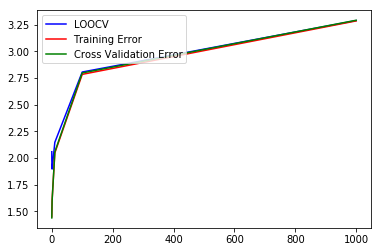

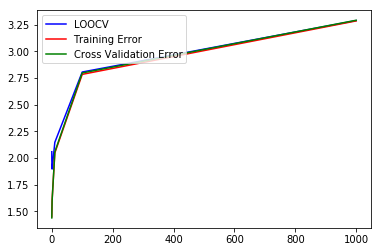

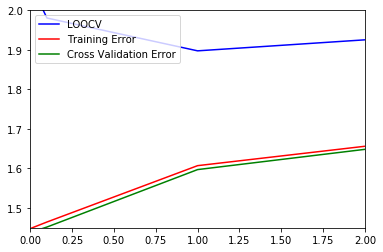

In [203]:
l_TE=[]
l_CE=[]
l_Kfold=[]
loop=[0.01, 0.1, 1, 10, 100, 1000]
# , 0.1, 1, 10, 100, 1000]
# , 0.1, 1, 10, 100, 1000]
Y_b=np.asmatrix(Y_b)
X_b=np.asmatrix(X_b)
I=np.asmatrix(I)
for lambda2 in loop:
    C=X_p + lambda2*I
    Cat=np.linalg.pinv(C)
    w=Cat*d
    error=LOOCV_final(w,Cat,X_b,Y_b)
    l_Kfold.append(error)
    Training_error = RMSE(w,X_b,Y_b)
    l_TE.append(Training_error)
    Crossvalidation_error = RMSE(w,VD_b,VL)
    l_CE.append(Crossvalidation_error) 
l_Kfold=np.array(l_Kfold).reshape(len(loop))
l_TE=np.array(l_TE).reshape(len(loop))
l_CE=np.array(l_CE).reshape(len(loop))

from matplotlib import pyplot as plt

import pylab
pylab.plot(loop, np.array(l_Kfold), '-b', label='LOOCV')
pylab.plot(loop, np.array(l_TE), '-r', label='Training Error')
pylab.plot(loop, np.array(l_CE), '-g', label='Cross Validation Error')
pylab.legend(loc='upper left')
pylab.show()


plt.plot(loop, np.array(l_Kfold), '-b', label='LOOCV')
plt.plot(loop, np.array(l_TE), '-r', label='Training Error')
plt.plot(loop, np.array(l_CE), '-g', label='Cross Validation Error')
plt.legend(loc='upper left')
# pylab.xlim(0, 2.0)
# pylab.ylim(1.45, 2.0)
plt.show()

plt.plot(loop, np.array(l_Kfold), '-b', label='LOOCV')
plt.plot(loop, np.array(l_TE), '-r', label='Training Error')
plt.plot(loop, np.array(l_CE), '-g', label='Cross Validation Error')
plt.legend(loc='upper left')
pylab.xlim(0, 2.0)
pylab.ylim(1.45, 2.0)
plt.show()


In [206]:
# l_Kfold=np.array(l_Kfold).reshape(len(loop))
# l_TE=np.array(l_TE).reshape(len(loop))
# l_CE=np.array(l_CE).reshape(len(loop))
# l_Kfold,l_TE,l_CE    values for lambda 1 [matrix([[1.89760613]])] [matrix([[1.60719423]])] [matrix([[1.59724705]])]

print("lambda", loop)
print("l_Kfold" ,l_Kfold)
print("l_TE",l_TE)
print("l_CE",l_CE)

[0.01, 0.1, 1, 10, 100, 1000]
l_Kfold [2.06008358 1.98063499 1.89760613 2.14847244 2.80754811 3.29000337]
l_TE [1.44963851 1.46462912 1.60719423 2.04876465 2.78536137 3.28669028]
l_CE [1.43957477 1.451906   1.59724705 2.05827853 2.79877028 3.29294835]


lambda [0.5        0.55555556 0.61111111 0.66666667 0.72222222 0.77777778
 0.83333333 0.88888889 0.94444444 1.        ]
l_Kfold [1.90164194 1.89917426 1.8974646  1.89636348 1.89575679 1.89555593
 1.89569105 1.89610642 1.89675701 1.89760613]
l_TE [1.53713136 1.54597702 1.55452059 1.56277845 1.57076702 1.57850211
 1.58599877 1.59327109 1.60033218 1.60719423]
l_CE [1.52478565 1.53388161 1.54268449 1.55120758 1.55946505 1.56747109
 1.57523953 1.58278351 1.59011548 1.59724705]


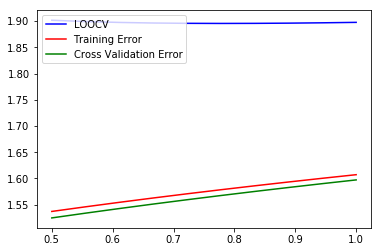

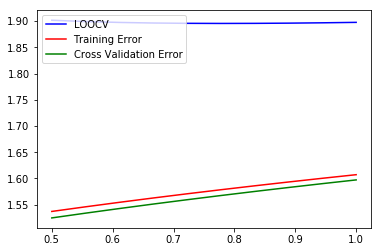

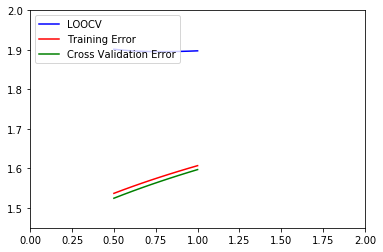

In [207]:
l_TE=[]
l_CE=[]
l_Kfold=[]
loop=np.linspace(0.5,1,10)
# , 0.1, 1, 10, 100, 1000]
# , 0.1, 1, 10, 100, 1000]
Y_b=np.asmatrix(Y_b)
X_b=np.asmatrix(X_b)
I=np.asmatrix(I)
for lambda2 in loop:
    C=X_p + lambda2*I
    Cat=np.linalg.pinv(C)
    w=Cat*d
    error=LOOCV_final(w,Cat,X_b,Y_b)
    l_Kfold.append(error)
    Training_error = RMSE(w,X_b,Y_b)
    l_TE.append(Training_error)
    Crossvalidation_error = RMSE(w,VD_b,VL)
    l_CE.append(Crossvalidation_error) 
l_Kfold=np.array(l_Kfold).reshape(len(loop))
l_TE=np.array(l_TE).reshape(len(loop))
l_CE=np.array(l_CE).reshape(len(loop))

print("lambda", loop)
print("l_Kfold" ,l_Kfold)
print("l_TE",l_TE)
print("l_CE",l_CE)
from matplotlib import pyplot as plt

import pylab
pylab.plot(loop, np.array(l_Kfold), '-b', label='LOOCV')
pylab.plot(loop, np.array(l_TE), '-r', label='Training Error')
pylab.plot(loop, np.array(l_CE), '-g', label='Cross Validation Error')
pylab.legend(loc='upper left')
pylab.show()


plt.plot(loop, np.array(l_Kfold), '-b', label='LOOCV')
plt.plot(loop, np.array(l_TE), '-r', label='Training Error')
plt.plot(loop, np.array(l_CE), '-g', label='Cross Validation Error')
plt.legend(loc='upper left')
# pylab.xlim(0, 2.0)
# pylab.ylim(1.45, 2.0)
plt.show()

plt.plot(loop, np.array(l_Kfold), '-b', label='LOOCV')
plt.plot(loop, np.array(l_TE), '-r', label='Training Error')
plt.plot(loop, np.array(l_CE), '-g', label='Cross Validation Error')
plt.legend(loc='upper left')
pylab.xlim(0, 2.0)
pylab.ylim(1.45, 2.0)
plt.show()


In [208]:
l_TE=[]
l_CE=[]
l_Kfold=[]
loop=[0.77777778]
# , 0.1, 1, 10, 100, 1000]
# , 0.1, 1, 10, 100, 1000]
Y_b=np.asmatrix(Y_b)
X_b=np.asmatrix(X_b)
I=np.asmatrix(I)
for lambda2 in loop:
    C=X_p + lambda2*I
    Cat=np.linalg.pinv(C)
    w=Cat*d
    error=LOOCV_final(w,Cat,X_b,Y_b)
    l_Kfold.append(error)
    Training_error = RMSE(w,X_b,Y_b)
    l_TE.append(Training_error)
    Crossvalidation_error = RMSE(w,VD_b,VL)
    l_CE.append(Crossvalidation_error) 
l_Kfold=np.array(l_Kfold).reshape(len(loop))
l_TE=np.array(l_TE).reshape(len(loop))
l_CE=np.array(l_CE).reshape(len(loop))

print("lambda", loop)
print("l_Kfold" ,l_Kfold)
print("l_TE",l_TE)
print("l_CE",l_CE)


np.savetxt("/Users/sriramreddy/Downloads/ML/2_python/value_lambda", (w.T)*TD_b, delimiter=",")

lambda [0.77777778]
l_Kfold [1.89555593]
l_TE [1.57850211]
l_CE [1.56747109]


In [209]:
l_TE=[]
l_CE=[]
l_Kfold=[]
loop=[0.79]
# , 0.1, 1, 10, 100, 1000]
# , 0.1, 1, 10, 100, 1000]
Y_b=np.asmatrix(Y_b)
X_b=np.asmatrix(X_b)
I=np.asmatrix(I)
for lambda2 in loop:
    C=X_p + lambda2*I
    Cat=np.linalg.pinv(C)
    w=Cat*d
    error=LOOCV_final(w,Cat,X_b,Y_b)
    l_Kfold.append(error)
    Training_error = RMSE(w,X_b,Y_b)
    l_TE.append(Training_error)
    Crossvalidation_error = RMSE(w,VD_b,VL)
    l_CE.append(Crossvalidation_error) 
l_Kfold=np.array(l_Kfold).reshape(len(loop))
l_TE=np.array(l_TE).reshape(len(loop))
l_CE=np.array(l_CE).reshape(len(loop))

print("lambda", loop)
print("l_Kfold" ,l_Kfold)
print("l_TE",l_TE)
print("l_CE",l_CE)


np.savetxt("/Users/sriramreddy/Downloads/ML/2_python/value_lambda_0.79", (w.T)*TD_b, delimiter=",")

lambda [0.79]
l_Kfold [1.89555896]
l_TE [1.58017133]
l_CE [1.56920006]


In [211]:
l_TE=[]
l_CE=[]
l_Kfold=[]
loop=[0.78]
# , 0.1, 1, 10, 100, 1000]
# , 0.1, 1, 10, 100, 1000]
Y_b=np.asmatrix(Y_b)
X_b=np.asmatrix(X_b)
I=np.asmatrix(I)
for lambda2 in loop:
    C=X_p + lambda2*I
    Cat=np.linalg.pinv(C)
    w=Cat*d
    error=LOOCV_final(w,Cat,X_b,Y_b)
    l_Kfold.append(error)
    Training_error = RMSE(w,X_b,Y_b)
    l_TE.append(Training_error)
    Crossvalidation_error = RMSE(w,VD_b,VL)
    l_CE.append(Crossvalidation_error) 
l_Kfold=np.array(l_Kfold).reshape(len(loop))
l_TE=np.array(l_TE).reshape(len(loop))
l_CE=np.array(l_CE).reshape(len(loop))

print("lambda", loop)
print("l_Kfold" ,l_Kfold)
print("l_TE",l_TE)
print("l_CE",l_CE)


np.savetxt("/Users/sriramreddy/Downloads/ML/2_python/value_lambda_0.65", (w.T)*TD_b, delimiter=",")

lambda [0.78]
l_Kfold [1.89555529]
l_TE [1.57880646]
l_CE [1.5677863]


In [ ]:
# 1.89555529 This is best LOOCV value 


In [212]:
#I'm fixing the validation set and training set as it is
df=pd.read_csv('/Users/sriramreddy/Downloads/ML/2_python/trainData.csv', sep=',',header=None)
df = df.drop(0, axis=1)
df.as_matrix()
df=df.T
C=df.shape
output=pd.read_csv('/Users/sriramreddy/Downloads/ML/2_python/trainLabels.csv', sep=',',header=None)
Y_b = output.drop(0, axis=1)
# Y_b.as_matrix()
Y_b=Y_b.values
print(Y_b.shape,Y_b[0],type(Y_b))
B=output.shape
N=B[0]
K=C[0]
zero_K=np.zeros((K,1))
zero_K.shape
zero_t=np.zeros((1,K+1))
zero_t.shape
I_k=np.eye(K)
I= np.hstack((I_k,zero_K))
print(P.shape,zero_t.shape)
I=np.vstack((I,zero_t))


X_b=np.vstack((df,np.ones((1,N))))


# What's the advantage of using features
l_TE=[]
l_CE=[]
l_Kfold=[]
loop=[0.01, 0.1, 1, 10, 100, 1000]
# 0.01, 0.1, 1, 10, 100, 1000]
# , 0.1, 1, 10, 100, 1000]
Y_b=np.asmatrix(Y_b)
X_b=np.asmatrix(X_b)
I=np.asmatrix(I)
for lambda2 in loop:
    C=X_p + lambda2*I
    Cat=np.linalg.pinv(C)
    w=Cat*d
    error=LOOCV_final(w,Cat,X_b,Y_b)
    l_Kfold.append(error)
    Training_error = RMSE(w,X_b,Y_b)
    l_TE.append(Training_error)
    Crossvalidation_error = RMSE(w,VD_b,VL)
    l_CE.append(Crossvalidation_error) 
l_Kfold=np.array(l_Kfold).reshape(len(loop))
l_TE=np.array(l_TE).reshape(len(loop))
l_CE=np.array(l_CE).reshape(len(loop))

print("lambda", loop)
print("l_Kfold" ,l_Kfold)
print("l_TE",l_TE)
print("l_CE",l_CE)

# np.savetxt("/Users/sriramreddy/Downloads/ML/2_python/value_lambda_0.65", (w.T)*TD_b, delimiter=",")

(5000, 1) [85] <class 'numpy.ndarray'>
(3001, 3001) (1, 3001)
lambda [0.01, 0.1, 1, 10, 100, 1000]
l_Kfold [2.07371987 1.99719366 1.90876406 2.13831798 2.7939617  3.28372707]
l_TE [1.45963287 1.47724265 1.61708022 2.03920638 2.77188759 3.28042028]
l_CE [1.43957477 1.451906   1.59724705 2.05827853 2.79877028 3.29294835]


In [219]:
print("The above values are with the original features")
print(X_b.shape)

The above values are with the original features
(3001, 5000)


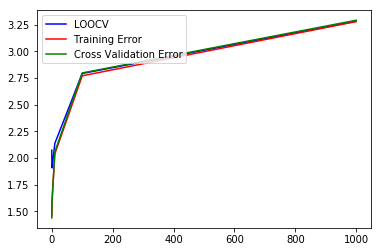

In [217]:
#Steps to be taken 
plt.plot(loop, np.array(l_Kfold), '-b', label='LOOCV')
plt.plot(loop, np.array(l_TE), '-r', label='Training Error')
plt.plot(loop, np.array(l_CE), '-g', label='Cross Validation Error')
plt.legend(loc='upper left')
# pylab.xlim(0, 1000.0)
# pylab.ylim(1.45, 2.25)
plt.show()
#Identify the problem as bias and try adding the features whether it can help in achieving the accuracy.

In [231]:
#I'm fixing the validation set as well as the cross validation 
#Can I write a function to do this ?

df=pd.read_csv('/Users/sriramreddy/Downloads/ML/2_python/trainData.csv', sep=',',header=None)
df = df.drop(0, axis=1)
df.as_matrix()
df=df.T
def addition_features(X):
    add = np.sum(X,axis=0)
    Y=np.multiply(X,X)
    Z=np.multiply(Y,X)
    square = np.sum(Y,axis=0)
    cube = np.sum(Z,axis=0)
    X = np.vstack((X,add))
    X = np.vstack((X,square))
    X = np.vstack((X,cube))
    X=np.asmatrix(X)
    return X

df=addition_features(df)

C=df.shape
output=pd.read_csv('/Users/sriramreddy/Downloads/ML/2_python/trainLabels.csv', sep=',',header=None)
Y_b = output.drop(0, axis=1)
# Y_b.as_matrix()
Y_b=Y_b.values
print(Y_b.shape,Y_b[0],type(Y_b))
B=output.shape
N=B[0]
K=C[0]
zero_K=np.zeros((K,1))
zero_K.shape
zero_t=np.zeros((1,K+1))
zero_t.shape
I_k=np.eye(K)
I= np.hstack((I_k,zero_K))
print(P.shape,zero_t.shape)
I=np.vstack((I,zero_t))
# ----------------------------Ensuring that the Input features are proper for cross validation as well as Test data set
VD=pd.read_csv('/Users/sriramreddy/Downloads/ML/2_python/valData.csv', sep=',',header=None)
VD = VD.drop(0, axis=1)
VD.as_matrix()
VD=VD.T
VD=addition_features(VD)


size_vd=VD.shape
size_vd1=size_vd[1]
print("VD.shape,size_vd1",VD.shape,size_vd1)
VD_b=np.vstack((VD,np.ones((1,size_vd1)) ))
VL=pd.read_csv('/Users/sriramreddy/Downloads/ML/2_python/valLabels.csv', sep=',',header=None)
VL = VL.drop(0, axis=1)
VL=VL.values
print("VL.shape",VL.shape)

TD=pd.read_csv('/Users/sriramreddy/Downloads/ML/2_python/testData.csv', sep=',',header=None)
TD = TD.drop(0, axis=1)
TD.as_matrix()
TD=TD.T

TD=addition_features(TD)

size_vd=TD.shape
size_vd1=size_vd[1]

TD_b=np.vstack((TD,np.ones((1,size_vd1))))
X_b=np.vstack((df,np.ones((1,N))))
print("X_b VD_b TD_b.shape",X_b.shape, VD_b.shape, TD_b.shape)
# What's the advantage of using features
l_TE=[]
l_CE=[]
l_Kfold=[]
loop=[0.01, 0.1, 1, 10, 100, 1000]
Y_b=np.asmatrix(Y_b)
X_b=np.asmatrix(X_b)
X_p=X_b*X_b.T
d=X_b*Y_b
I=np.asmatrix(I)
for lambda2 in loop:
    C=X_p + lambda2*I
    Cat=np.linalg.pinv(C)
    w=Cat*d
    error=LOOCV_final(w,Cat,X_b,Y_b)
    l_Kfold.append(error)
    Training_error = RMSE(w,X_b,Y_b)
    l_TE.append(Training_error)
    Crossvalidation_error = RMSE(w,VD_b,VL)
    l_CE.append(Crossvalidation_error) 
l_Kfold=np.array(l_Kfold).reshape(len(loop))
l_TE=np.array(l_TE).reshape(len(loop))
l_CE=np.array(l_CE).reshape(len(loop))

print("lambda", loop)
print("l_Kfold" ,l_Kfold)
print("l_TE",l_TE)
print("l_CE",l_CE)
# np.savetxt("/Users/sriramreddy/Downloads/ML/2_python/value_lambda_0.65", (w.T)*TD_b, delimiter=",")

(5000, 1) [85] <class 'numpy.ndarray'>
(3001, 3001) (1, 3004)
VD.shape,size_vd1 (3003, 5000) 5000
VL.shape (5000, 1)
X_b VD_b TD_b.shape (3004, 5000) (3004, 5000) (3004, 5000)
lambda [0.01, 0.1, 1, 10, 100, 1000]
l_Kfold [2.57894951 2.17275085 1.95135383 2.13071354 2.52380839 2.75199261]
l_TE [1.11851918 1.21743011 1.53149789 2.01081162 2.50181164 2.74853281]
l_CE [2.57801392 2.14477744 1.93583891 2.14598165 2.5316052  2.75299451]


In [226]:
print(w.shape,VD_b.shape,Y_b.shape)

(3004, 1) (3010, 5000) (5000, 1)


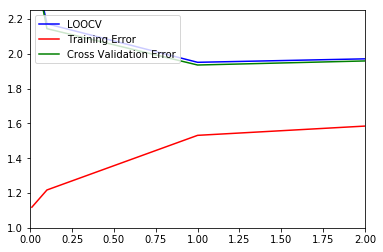

In [234]:
# identify the bias and other terms properly.
plt.plot(loop, np.array(l_Kfold), '-b', label='LOOCV')
plt.plot(loop, np.array(l_TE), '-r', label='Training Error')
plt.plot(loop, np.array(l_CE), '-g', label='Cross Validation Error')
plt.legend(loc='upper left')
pylab.xlim(0, 2)
pylab.ylim(1, 2.25)
plt.show()

In [236]:
#I'm fixing the validation set as well as the cross validation 
#Can I write a function to do this ?
df=pd.read_csv('/Users/sriramreddy/Downloads/ML/2_python/trainData.csv', sep=',',header=None)
df = df.drop(0, axis=1)
df.as_matrix()
df=df.T
def addition_features(X):
    add = np.sum(X,axis=0)
    Y=np.multiply(X,X)
    Z=np.multiply(Y,X)
    square = np.sum(Y,axis=0)
    cube = np.sum(Z,axis=0)
    X = np.vstack((X,add))
    X = np.vstack((X,square))
    X = np.vstack((X,cube))
    X=np.asmatrix(X)
    return X

df=addition_features(df)

C=df.shape
output=pd.read_csv('/Users/sriramreddy/Downloads/ML/2_python/trainLabels.csv', sep=',',header=None)
Y_b = output.drop(0, axis=1)
# Y_b.as_matrix()
Y_b=Y_b.values
print(Y_b.shape,Y_b[0],type(Y_b))
B=output.shape
N=B[0]
K=C[0]
zero_K=np.zeros((K,1))
zero_K.shape
zero_t=np.zeros((1,K+1))
zero_t.shape
I_k=np.eye(K)
I= np.hstack((I_k,zero_K))
print(P.shape,zero_t.shape)
I=np.vstack((I,zero_t))
# ----------------------------Ensuring that the Input features are proper for cross validation as well as Test data set
VD=pd.read_csv('/Users/sriramreddy/Downloads/ML/2_python/valData.csv', sep=',',header=None)
VD = VD.drop(0, axis=1)
VD.as_matrix()
VD=VD.T
VD=addition_features(VD)


size_vd=VD.shape
size_vd1=size_vd[1]
print("VD.shape,size_vd1",VD.shape,size_vd1)
VD_b=np.vstack((VD,np.ones((1,size_vd1)) ))
VL=pd.read_csv('/Users/sriramreddy/Downloads/ML/2_python/valLabels.csv', sep=',',header=None)
VL = VL.drop(0, axis=1)
VL=VL.values
print("VL.shape",VL.shape)

TD=pd.read_csv('/Users/sriramreddy/Downloads/ML/2_python/testData.csv', sep=',',header=None)
TD = TD.drop(0, axis=1)
TD.as_matrix()
TD=TD.T

TD=addition_features(TD)

size_vd=TD.shape
size_vd1=size_vd[1]

TD_b=np.vstack((TD,np.ones((1,size_vd1))))
X_b=np.vstack((df,np.ones((1,N))))
print("X_b VD_b TD_b.shape",X_b.shape, VD_b.shape, TD_b.shape)
# What's the advantage of using features
l_TE=[]
l_CE=[]
l_Kfold=[]
loop=np.linspace(0.3,0.8,10)
Y_b=np.asmatrix(Y_b)
X_b=np.asmatrix(X_b)
X_p=X_b*X_b.T
d=X_b*Y_b
I=np.asmatrix(I)
for lambda2 in loop:
    C=X_p + lambda2*I
    Cat=np.linalg.pinv(C)
    w=Cat*d
    error=LOOCV_final(w,Cat,X_b,Y_b)
    l_Kfold.append(error)
    Training_error = RMSE(w,X_b,Y_b)
    l_TE.append(Training_error)
    Crossvalidation_error = RMSE(w,VD_b,VL)
    l_CE.append(Crossvalidation_error) 
l_Kfold=np.array(l_Kfold).reshape(len(loop))
l_TE=np.array(l_TE).reshape(len(loop))
l_CE=np.array(l_CE).reshape(len(loop))

print("lambda", loop)
print("l_Kfold" ,l_Kfold)
print("l_TE",l_TE)
print("l_CE",l_CE)
# np.savetxt("/Users/sriramreddy/Downloads/ML/2_python/value_lambda_0.65", (w.T)*TD_b, delimiter=",")

(5000, 1) [85] <class 'numpy.ndarray'>
(3001, 3001) (1, 3004)
VD.shape,size_vd1 (3003, 5000) 5000
VL.shape (5000, 1)
X_b VD_b TD_b.shape (3004, 5000) (3004, 5000) (3004, 5000)
lambda [0.3        0.35555556 0.41111111 0.46666667 0.52222222 0.57777778
 0.63333333 0.68888889 0.74444444 0.8       ]
l_Kfold [2.01712368 2.00073901 1.98856504 1.97933074 1.97223152 1.9667315
 1.96245918 1.95914855 1.95660394 1.95467815]
l_TE [1.3387428  1.36244819 1.38369304 1.40295941 1.42059734 1.43686973
 1.45197945 1.46608655 1.47931965 1.49178378]
l_CE [1.98901303 1.97365329 1.96257252 1.95445138 1.94845896 1.94404478
 1.94082937 1.93854254 1.93698675 1.93601433]


In [ ]:
np.savetxt("/Users/sriramreddy/Downloads/ML/2_python/value_new_f_l_1.167", (w.T)*TD_b, delimiter=",")

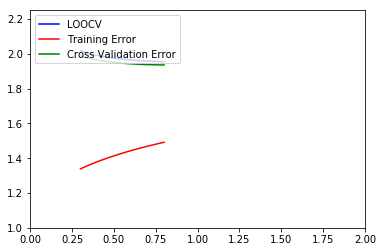

In [237]:
# identify the bias and other terms properly.
plt.plot(loop, np.array(l_Kfold), '-b', label='LOOCV')
plt.plot(loop, np.array(l_TE), '-r', label='Training Error')
plt.plot(loop, np.array(l_CE), '-g', label='Cross Validation Error')
plt.legend(loc='upper left')
pylab.xlim(0, 2)
pylab.ylim(1, 2.25)
plt.show()

In [238]:
#I'm fixing the validation set as well as the cross validation 
#Can I write a function to do this ?
df=pd.read_csv('/Users/sriramreddy/Downloads/ML/2_python/trainData.csv', sep=',',header=None)
df = df.drop(0, axis=1)
df.as_matrix()
df=df.T
def addition_features(X):
    add = np.sum(X,axis=0)
    Y=np.multiply(X,X)
    Z=np.multiply(Y,X)
    square = np.sum(Y,axis=0)
    cube = np.sum(Z,axis=0)
    X = np.vstack((X,add))
    X = np.vstack((X,square))
    X = np.vstack((X,cube))
    X=np.asmatrix(X)
    return X

df=addition_features(df)

C=df.shape
output=pd.read_csv('/Users/sriramreddy/Downloads/ML/2_python/trainLabels.csv', sep=',',header=None)
Y_b = output.drop(0, axis=1)
# Y_b.as_matrix()
Y_b=Y_b.values
print(Y_b.shape,Y_b[0],type(Y_b))
B=output.shape
N=B[0]
K=C[0]
zero_K=np.zeros((K,1))
zero_K.shape
zero_t=np.zeros((1,K+1))
zero_t.shape
I_k=np.eye(K)
I= np.hstack((I_k,zero_K))
print(P.shape,zero_t.shape)
I=np.vstack((I,zero_t))
# ----------------------------Ensuring that the Input features are proper for cross validation as well as Test data set
VD=pd.read_csv('/Users/sriramreddy/Downloads/ML/2_python/valData.csv', sep=',',header=None)
VD = VD.drop(0, axis=1)
VD.as_matrix()
VD=VD.T
VD=addition_features(VD)


size_vd=VD.shape
size_vd1=size_vd[1]
print("VD.shape,size_vd1",VD.shape,size_vd1)
VD_b=np.vstack((VD,np.ones((1,size_vd1)) ))
VL=pd.read_csv('/Users/sriramreddy/Downloads/ML/2_python/valLabels.csv', sep=',',header=None)
VL = VL.drop(0, axis=1)
VL=VL.values
print("VL.shape",VL.shape)

TD=pd.read_csv('/Users/sriramreddy/Downloads/ML/2_python/testData.csv', sep=',',header=None)
TD = TD.drop(0, axis=1)
TD.as_matrix()
TD=TD.T

TD=addition_features(TD)

size_vd=TD.shape
size_vd1=size_vd[1]

TD_b=np.vstack((TD,np.ones((1,size_vd1))))
X_b=np.vstack((df,np.ones((1,N))))
print("X_b VD_b TD_b.shape",X_b.shape, VD_b.shape, TD_b.shape)
# What's the advantage of using features
l_TE=[]
l_CE=[]
l_Kfold=[]
loop=np.linspace(0.8,2,10)
Y_b=np.asmatrix(Y_b)
X_b=np.asmatrix(X_b)
X_p=X_b*X_b.T
d=X_b*Y_b
I=np.asmatrix(I)
for lambda2 in loop:
    C=X_p + lambda2*I
    Cat=np.linalg.pinv(C)
    w=Cat*d
    error=LOOCV_final(w,Cat,X_b,Y_b)
    l_Kfold.append(error)
    Training_error = RMSE(w,X_b,Y_b)
    l_TE.append(Training_error)
    Crossvalidation_error = RMSE(w,VD_b,VL)
    l_CE.append(Crossvalidation_error) 
l_Kfold=np.array(l_Kfold).reshape(len(loop))
l_TE=np.array(l_TE).reshape(len(loop))
l_CE=np.array(l_CE).reshape(len(loop))

print("lambda", loop)
print("l_Kfold" ,l_Kfold)
print("l_TE",l_TE)
print("l_CE",l_CE)
# np.savetxt("/Users/sriramreddy

(5000, 1) [85] <class 'numpy.ndarray'>
(3001, 3001) (1, 3004)
VD.shape,size_vd1 (3003, 5000) 5000
VL.shape (5000, 1)
X_b VD_b TD_b.shape (3004, 5000) (3004, 5000) (3004, 5000)
lambda [0.8        0.93333333 1.06666667 1.2        1.33333333 1.46666667
 1.6        1.73333333 1.86666667 2.        ]
l_Kfold [1.95467815 1.9519564  1.95187213 1.95157443 1.9528886  1.95481698
 1.95718476 1.95986991 1.96278518 1.96586698]
l_TE [1.49178378 1.51905118 1.58149812 1.56507226 1.58490353 1.60309953
 1.61991547 1.63555071 1.65016407 1.66388415]
l_CE [1.93601433 1.93543935 1.94160138 1.93880911 1.94176607 1.94520529
 1.94896698 1.95294214 1.95705474 1.96125084]


In [ ]:
# The below values of orig training data shows that it has high LOOCV error.
# 1.95157443 for lambda 1.2
# 1.95135383 for lambda 1

# For entire training data
# 1.86733708 for lambda 1.16666667
# By removing the cubic feature
# 1.86801302 for lambda 1.16666667

# after adding 2 extra features
# 1.86563669 for lambda 1.16666667

# By adding the feature,
# Let me check the values 

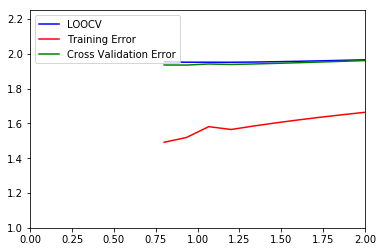

In [239]:
# identify the bias and other terms properly.
plt.plot(loop, np.array(l_Kfold), '-b', label='LOOCV')
plt.plot(loop, np.array(l_TE), '-r', label='Training Error')
plt.plot(loop, np.array(l_CE), '-g', label='Cross Validation Error')
plt.legend(loc='upper left')
pylab.xlim(0, 2)
pylab.ylim(1, 2.25)
plt.show()

In [240]:
df=pd.read_csv('/Users/sriramreddy/Downloads/ML/2_python/all', sep=',',header=None)
df = df.drop(0, axis=1)
df.as_matrix()
df=df.T
def addition_features(X):
    add = np.sum(X,axis=0)
    Y=np.multiply(X,X)
    Z=np.multiply(Y,X)
    square = np.sum(Y,axis=0)
    cube = np.sum(Z,axis=0)
    X = np.vstack((X,add))
    X = np.vstack((X,square))
    X = np.vstack((X,cube))
    X=np.asmatrix(X)
    return X

df=addition_features(df)

C=df.shape
output=pd.read_csv('/Users/sriramreddy/Downloads/ML/2_python/all_label', sep=',',header=None)
Y_b = output.drop(0, axis=1)
# Y_b.as_matrix()
Y_b=Y_b.values
print(Y_b.shape,Y_b[0],type(Y_b))
B=output.shape
N=B[0]
K=C[0]
zero_K=np.zeros((K,1))
zero_K.shape
zero_t=np.zeros((1,K+1))
zero_t.shape
I_k=np.eye(K)
I= np.hstack((I_k,zero_K))
print(P.shape,zero_t.shape)
I=np.vstack((I,zero_t))
# ----------------------------Ensuring that the Input features are proper for cross validation as well as Test data set
VD=pd.read_csv('/Users/sriramreddy/Downloads/ML/2_python/valData.csv', sep=',',header=None)
VD = VD.drop(0, axis=1)
VD.as_matrix()
VD=VD.T
VD=addition_features(VD)


size_vd=VD.shape
size_vd1=size_vd[1]
print("VD.shape,size_vd1",VD.shape,size_vd1)
VD_b=np.vstack((VD,np.ones((1,size_vd1)) ))
VL=pd.read_csv('/Users/sriramreddy/Downloads/ML/2_python/valLabels.csv', sep=',',header=None)
VL = VL.drop(0, axis=1)
VL=VL.values
print("VL.shape",VL.shape)

TD=pd.read_csv('/Users/sriramreddy/Downloads/ML/2_python/testData.csv', sep=',',header=None)
TD = TD.drop(0, axis=1)
TD.as_matrix()
TD=TD.T

TD=addition_features(TD)

size_vd=TD.shape
size_vd1=size_vd[1]

TD_b=np.vstack((TD,np.ones((1,size_vd1))))
X_b=np.vstack((df,np.ones((1,N))))
print("X_b VD_b TD_b.shape",X_b.shape, VD_b.shape, TD_b.shape)
# What's the advantage of using features
l_TE=[]
l_CE=[]
l_Kfold=[]
loop=np.linspace(0.5,1.5,10)
Y_b=np.asmatrix(Y_b)
X_b=np.asmatrix(X_b)
X_p=X_b*X_b.T
d=X_b*Y_b
I=np.asmatrix(I)
for lambda2 in loop:
    C=X_p + lambda2*I
    Cat=np.linalg.pinv(C)
    w=Cat*d
    error=LOOCV_final(w,Cat,X_b,Y_b)
    l_Kfold.append(error)
    Training_error = RMSE(w,X_b,Y_b)
    l_TE.append(Training_error)
    Crossvalidation_error = RMSE(w,VD_b,VL)
    l_CE.append(Crossvalidation_error) 
l_Kfold=np.array(l_Kfold).reshape(len(loop))
l_TE=np.array(l_TE).reshape(len(loop))
l_CE=np.array(l_CE).reshape(len(loop))

print("lambda", loop)
print("l_Kfold" ,l_Kfold)
print("l_TE",l_TE)
print("l_CE",l_CE)

(10000, 1) [85] <class 'numpy.ndarray'>
(3001, 3001) (1, 3004)
VD.shape,size_vd1 (3003, 5000) 5000
VL.shape (5000, 1)
X_b VD_b TD_b.shape (3004, 10000) (3004, 5000) (3004, 5000)
lambda [0.5        0.61111111 0.72222222 0.83333333 0.94444444 1.05555556
 1.16666667 1.27777778 1.38888889 1.5       ]
l_Kfold [1.88550338 1.87793921 1.87305814 1.87000689 1.86825186 1.86744201
 1.86733708 1.8677673  1.86860955 1.86977256]
l_TE [1.52398173 1.53844966 1.55190757 1.56447576 1.57626049 1.58735292
 1.59783061 1.60775949 1.61719583 1.62618788]
l_CE [1.51489637 1.53002412 1.54410822 1.55726777 1.56961039 1.58122952
 1.59220517 1.60260565 1.6124894  1.62190666]


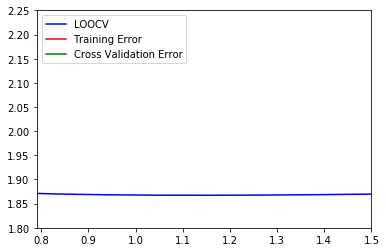

In [245]:
# identify the bias and other terms properly.
plt.plot(loop, np.array(l_Kfold), '-b', label='LOOCV')
plt.plot(loop, np.array(l_TE), '-r', label='Training Error')
plt.plot(loop, np.array(l_CE), '-g', label='Cross Validation Error')
plt.legend(loc='upper left')
pylab.xlim(0.79, 1.5)
pylab.ylim(1.8, 2.25)
plt.show()

In [246]:
df=pd.read_csv('/Users/sriramreddy/Downloads/ML/2_python/all', sep=',',header=None)
df = df.drop(0, axis=1)
df.as_matrix()
df=df.T
def addition_features(X):
    add = np.sum(X,axis=0)
    Y=np.multiply(X,X)
    Z=np.multiply(Y,X)
    square = np.sum(Y,axis=0)
#     cube = np.sum(Z,axis=0)
    X = np.vstack((X,add))
    X = np.vstack((X,square))
#     X = np.vstack((X,cube))
    X=np.asmatrix(X)
    return X

df=addition_features(df)

C=df.shape
output=pd.read_csv('/Users/sriramreddy/Downloads/ML/2_python/all_label', sep=',',header=None)
Y_b = output.drop(0, axis=1)
# Y_b.as_matrix()
Y_b=Y_b.values
print(Y_b.shape,Y_b[0],type(Y_b))
B=output.shape
N=B[0]
K=C[0]
zero_K=np.zeros((K,1))
zero_K.shape
zero_t=np.zeros((1,K+1))
zero_t.shape
I_k=np.eye(K)
I= np.hstack((I_k,zero_K))
print(P.shape,zero_t.shape)
I=np.vstack((I,zero_t))
# ----------------------------Ensuring that the Input features are proper for cross validation as well as Test data set
VD=pd.read_csv('/Users/sriramreddy/Downloads/ML/2_python/valData.csv', sep=',',header=None)
VD = VD.drop(0, axis=1)
VD.as_matrix()
VD=VD.T
VD=addition_features(VD)


size_vd=VD.shape
size_vd1=size_vd[1]
print("VD.shape,size_vd1",VD.shape,size_vd1)
VD_b=np.vstack((VD,np.ones((1,size_vd1)) ))
VL=pd.read_csv('/Users/sriramreddy/Downloads/ML/2_python/valLabels.csv', sep=',',header=None)
VL = VL.drop(0, axis=1)
VL=VL.values
print("VL.shape",VL.shape)

TD=pd.read_csv('/Users/sriramreddy/Downloads/ML/2_python/testData.csv', sep=',',header=None)
TD = TD.drop(0, axis=1)
TD.as_matrix()
TD=TD.T

TD=addition_features(TD)

size_vd=TD.shape
size_vd1=size_vd[1]

TD_b=np.vstack((TD,np.ones((1,size_vd1))))
X_b=np.vstack((df,np.ones((1,N))))
print("X_b VD_b TD_b.shape",X_b.shape, VD_b.shape, TD_b.shape)
# What's the advantage of using features
l_TE=[]
l_CE=[]
l_Kfold=[]
loop=np.linspace(0.5,1.5,10)
Y_b=np.asmatrix(Y_b)
X_b=np.asmatrix(X_b)
X_p=X_b*X_b.T
d=X_b*Y_b
I=np.asmatrix(I)
for lambda2 in loop:
    C=X_p + lambda2*I
    Cat=np.linalg.pinv(C)
    w=Cat*d
    error=LOOCV_final(w,Cat,X_b,Y_b)
    l_Kfold.append(error)
    Training_error = RMSE(w,X_b,Y_b)
    l_TE.append(Training_error)
    Crossvalidation_error = RMSE(w,VD_b,VL)
    l_CE.append(Crossvalidation_error) 
l_Kfold=np.array(l_Kfold).reshape(len(loop))
l_TE=np.array(l_TE).reshape(len(loop))
l_CE=np.array(l_CE).reshape(len(loop))

print("lambda", loop)
print("l_Kfold" ,l_Kfold)
print("l_TE",l_TE)
print("l_CE",l_CE)

(10000, 1) [85] <class 'numpy.ndarray'>
(3001, 3001) (1, 3003)
VD.shape,size_vd1 (3002, 5000) 5000
VL.shape (5000, 1)
X_b VD_b TD_b.shape (3003, 10000) (3003, 5000) (3003, 5000)
lambda [0.5        0.61111111 0.72222222 0.83333333 0.94444444 1.05555556
 1.16666667 1.27777778 1.38888889 1.5       ]
l_Kfold [1.88606586 1.8785372  1.87368309 1.87065191 1.86891139 1.86811156
 1.86801302 1.86844668 1.86928999 1.87045212]
l_TE [1.52465663 1.53914654 1.55262079 1.56520059 1.57699301 1.58808989
 1.59856936 1.60849787 1.61793206 1.62692052]
l_CE [1.51523934 1.53042378 1.54455499 1.55775332 1.57012765 1.58177254
 1.59276894 1.60318595 1.61308272 1.62251002]


In [247]:
df=pd.read_csv('/Users/sriramreddy/Downloads/ML/2_python/all', sep=',',header=None)
df = df.drop(0, axis=1)
df.as_matrix()
df=df.T
def addition_features(X):
    add = np.sum(X,axis=0)
    Y=np.multiply(X,X)
    Z=np.multiply(Y,X)
    A=np.multiply(Z,X)
    square = np.sum(Y,axis=0)
    cube = np.sum(Z,axis=0)
    forth = np.sum(A,axis=0)
    fifth =np.square(add)
    X = np.vstack((X,add))
    X = np.vstack((X,square))
    X = np.vstack((X,cube))
    X = np.vstack((X,forth))
    X = np.vstack((X,fifth))
    X=np.asmatrix(X)
    return X

df=addition_features(df)

C=df.shape
output=pd.read_csv('/Users/sriramreddy/Downloads/ML/2_python/all_label', sep=',',header=None)
Y_b = output.drop(0, axis=1)
# Y_b.as_matrix()
Y_b=Y_b.values
print(Y_b.shape,Y_b[0],type(Y_b))
B=output.shape
N=B[0]
K=C[0]
zero_K=np.zeros((K,1))
zero_K.shape
zero_t=np.zeros((1,K+1))
zero_t.shape
I_k=np.eye(K)
I= np.hstack((I_k,zero_K))
print(P.shape,zero_t.shape)
I=np.vstack((I,zero_t))
# ----------------------------Ensuring that the Input features are proper for cross validation as well as Test data set
VD=pd.read_csv('/Users/sriramreddy/Downloads/ML/2_python/valData.csv', sep=',',header=None)
VD = VD.drop(0, axis=1)
VD.as_matrix()
VD=VD.T
VD=addition_features(VD)


size_vd=VD.shape
size_vd1=size_vd[1]
print("VD.shape,size_vd1",VD.shape,size_vd1)
VD_b=np.vstack((VD,np.ones((1,size_vd1)) ))
VL=pd.read_csv('/Users/sriramreddy/Downloads/ML/2_python/valLabels.csv', sep=',',header=None)
VL = VL.drop(0, axis=1)
VL=VL.values
print("VL.shape",VL.shape)

TD=pd.read_csv('/Users/sriramreddy/Downloads/ML/2_python/testData.csv', sep=',',header=None)
TD = TD.drop(0, axis=1)
TD.as_matrix()
TD=TD.T

TD=addition_features(TD)

size_vd=TD.shape
size_vd1=size_vd[1]

TD_b=np.vstack((TD,np.ones((1,size_vd1))))
X_b=np.vstack((df,np.ones((1,N))))
print("X_b VD_b TD_b.shape",X_b.shape, VD_b.shape, TD_b.shape)
# What's the advantage of using features
l_TE=[]
l_CE=[]
l_Kfold=[]
loop=np.linspace(0.5,1.5,10)
Y_b=np.asmatrix(Y_b)
X_b=np.asmatrix(X_b)
X_p=X_b*X_b.T
d=X_b*Y_b
I=np.asmatrix(I)
for lambda2 in loop:
    C=X_p + lambda2*I
    Cat=np.linalg.pinv(C)
    w=Cat*d
    error=LOOCV_final(w,Cat,X_b,Y_b)
    l_Kfold.append(error)
    Training_error = RMSE(w,X_b,Y_b)
    l_TE.append(Training_error)
    Crossvalidation_error = RMSE(w,VD_b,VL)
    l_CE.append(Crossvalidation_error) 
l_Kfold=np.array(l_Kfold).reshape(len(loop))
l_TE=np.array(l_TE).reshape(len(loop))
l_CE=np.array(l_CE).reshape(len(loop))

print("lambda", loop)
print("l_Kfold" ,l_Kfold)
print("l_TE",l_TE)
print("l_CE",l_CE)

(10000, 1) [85] <class 'numpy.ndarray'>
(3001, 3001) (1, 3006)
VD.shape,size_vd1 (3005, 5000) 5000
VL.shape (5000, 1)
X_b VD_b TD_b.shape (3006, 10000) (3006, 5000) (3006, 5000)
lambda [0.5        0.61111111 0.72222222 0.83333333 0.94444444 1.05555556
 1.16666667 1.27777778 1.38888889 1.5       ]
l_Kfold [1.88369085 1.8761421  1.87127816 1.86824552 1.86651019 1.86572077
 1.86563669 1.86608796 1.86695125 1.86813515]
l_TE [1.5223211  1.53679072 1.55025289 1.56282761 1.57462071 1.58572297
 1.5962116  1.60615224 1.61560093 1.62460572]
l_CE [1.51339271 1.52853501 1.54263262 1.55580562 1.56816206 1.57979547
 1.59078584 1.60120139 1.6111005  1.62053327]


In [248]:
df=pd.read_csv('/Users/sriramreddy/Downloads/ML/2_python/all', sep=',',header=None)
df = df.drop(0, axis=1)
df.as_matrix()
df=df.T
def addition_features(X):
    add = np.sum(X,axis=0)
    Y=np.multiply(X,X)
    Z=np.multiply(Y,X)
    A=np.multiply(Z,X)
    square = np.sum(Y,axis=0)
    cube = np.sum(Z,axis=0)
    forth = np.sum(A,axis=0)
    fifth =np.square(add)
    X = np.vstack((X,add))
    X = np.vstack((X,square))
    X = np.vstack((X,cube))
    X = np.vstack((X,forth))
    X = np.vstack((X,fifth))
    X=np.asmatrix(X)
    return X

df=addition_features(df)

C=df.shape
output=pd.read_csv('/Users/sriramreddy/Downloads/ML/2_python/all_label', sep=',',header=None)
Y_b = output.drop(0, axis=1)
# Y_b.as_matrix()
Y_b=Y_b.values
print(Y_b.shape,Y_b[0],type(Y_b))
B=output.shape
N=B[0]
K=C[0]
zero_K=np.zeros((K,1))
zero_K.shape
zero_t=np.zeros((1,K+1))
zero_t.shape
I_k=np.eye(K)
I= np.hstack((I_k,zero_K))
print(P.shape,zero_t.shape)
I=np.vstack((I,zero_t))
# ----------------------------Ensuring that the Input features are proper for cross validation as well as Test data set
VD=pd.read_csv('/Users/sriramreddy/Downloads/ML/2_python/valData.csv', sep=',',header=None)
VD = VD.drop(0, axis=1)
VD.as_matrix()
VD=VD.T
VD=addition_features(VD)


size_vd=VD.shape
size_vd1=size_vd[1]
print("VD.shape,size_vd1",VD.shape,size_vd1)
VD_b=np.vstack((VD,np.ones((1,size_vd1)) ))
VL=pd.read_csv('/Users/sriramreddy/Downloads/ML/2_python/valLabels.csv', sep=',',header=None)
VL = VL.drop(0, axis=1)
VL=VL.values
print("VL.shape",VL.shape)

TD=pd.read_csv('/Users/sriramreddy/Downloads/ML/2_python/testData.csv', sep=',',header=None)
TD = TD.drop(0, axis=1)
TD.as_matrix()
TD=TD.T

TD=addition_features(TD)

size_vd=TD.shape
size_vd1=size_vd[1]

TD_b=np.vstack((TD,np.ones((1,size_vd1))))
X_b=np.vstack((df,np.ones((1,N))))
print("X_b VD_b TD_b.shape",X_b.shape, VD_b.shape, TD_b.shape)
# What's the advantage of using features
l_TE=[]
l_CE=[]
l_Kfold=[]
loop=[1.16666667]
# np.linspace(0.5,1.5,10)
Y_b=np.asmatrix(Y_b)
X_b=np.asmatrix(X_b)
X_p=X_b*X_b.T
d=X_b*Y_b
I=np.asmatrix(I)
for lambda2 in loop:
    C=X_p + lambda2*I
    Cat=np.linalg.pinv(C)
    w=Cat*d
    error=LOOCV_final(w,Cat,X_b,Y_b)
    l_Kfold.append(error)
    Training_error = RMSE(w,X_b,Y_b)
    l_TE.append(Training_error)
    Crossvalidation_error = RMSE(w,VD_b,VL)
    l_CE.append(Crossvalidation_error) 
l_Kfold=np.array(l_Kfold).reshape(len(loop))
l_TE=np.array(l_TE).reshape(len(loop))
l_CE=np.array(l_CE).reshape(len(loop))

print("lambda", loop)
print("l_Kfold" ,l_Kfold)
print("l_TE",l_TE)
print("l_CE",l_CE)

(10000, 1) [85] <class 'numpy.ndarray'>
(3001, 3001) (1, 3006)
VD.shape,size_vd1 (3005, 5000) 5000
VL.shape (5000, 1)
X_b VD_b TD_b.shape (3006, 10000) (3006, 5000) (3006, 5000)
lambda [1.16666667]
l_Kfold [1.86563669]
l_TE [1.5962116]
l_CE [1.59078584]


In [249]:
np.savetxt("/Users/sriramreddy/Downloads/ML/2_python/value_new_l_1.167", (w.T)*TD_b, delimiter=",")

In [251]:
df=pd.read_csv('/Users/sriramreddy/Downloads/ML/2_python/all', sep=',',header=None)
df = df.drop(0, axis=1)
df.as_matrix()
df=df.T
def addition_features(X):
    add = np.sum(X,axis=0)
    Y=np.multiply(X,X)
    Z=np.multiply(Y,X)
    A=np.multiply(Z,X)
    square = np.sum(Y,axis=0)
    cube = np.sum(Z,axis=0)
    forth = np.sum(A,axis=0)
    fifth =np.square(add)
    sixth=np.square(square)
    X = np.vstack((X,add))
    X = np.vstack((X,square))
    X = np.vstack((X,cube))
    X = np.vstack((X,forth))
    X = np.vstack((X,fifth))
    X = np.vstack((X,sixth))
    X=np.asmatrix(X)
    return X

df=addition_features(df)

C=df.shape
output=pd.read_csv('/Users/sriramreddy/Downloads/ML/2_python/all_label', sep=',',header=None)
Y_b = output.drop(0, axis=1)
# Y_b.as_matrix()
Y_b=Y_b.values
print(Y_b.shape,Y_b[0],type(Y_b))
B=output.shape
N=B[0]
K=C[0]
zero_K=np.zeros((K,1))
zero_K.shape
zero_t=np.zeros((1,K+1))
zero_t.shape
I_k=np.eye(K)
I= np.hstack((I_k,zero_K))
print(P.shape,zero_t.shape)
I=np.vstack((I,zero_t))
# ----------------------------Ensuring that the Input features are proper for cross validation as well as Test data set
VD=pd.read_csv('/Users/sriramreddy/Downloads/ML/2_python/valData.csv', sep=',',header=None)
VD = VD.drop(0, axis=1)
VD.as_matrix()
VD=VD.T
VD=addition_features(VD)


size_vd=VD.shape
size_vd1=size_vd[1]
print("VD.shape,size_vd1",VD.shape,size_vd1)
VD_b=np.vstack((VD,np.ones((1,size_vd1)) ))
VL=pd.read_csv('/Users/sriramreddy/Downloads/ML/2_python/valLabels.csv', sep=',',header=None)
VL = VL.drop(0, axis=1)
VL=VL.values
print("VL.shape",VL.shape)

TD=pd.read_csv('/Users/sriramreddy/Downloads/ML/2_python/testData.csv', sep=',',header=None)
TD = TD.drop(0, axis=1)
TD.as_matrix()
TD=TD.T

TD=addition_features(TD)

size_vd=TD.shape
size_vd1=size_vd[1]

TD_b=np.vstack((TD,np.ones((1,size_vd1))))
X_b=np.vstack((df,np.ones((1,N))))
print("X_b VD_b TD_b.shape",X_b.shape, VD_b.shape, TD_b.shape)
# What's the advantage of using features
l_TE=[]
l_CE=[]
l_Kfold=[]
loop=np.linspace(1,1.4,10)
# [1.16666667]
# np.linspace(0.5,1.5,10)
Y_b=np.asmatrix(Y_b)
X_b=np.asmatrix(X_b)
X_p=X_b*X_b.T
d=X_b*Y_b
I=np.asmatrix(I)
for lambda2 in loop:
    C=X_p + lambda2*I
    Cat=np.linalg.pinv(C)
    w=Cat*d
    error=LOOCV_final(w,Cat,X_b,Y_b)
    l_Kfold.append(error)
    Training_error = RMSE(w,X_b,Y_b)
    l_TE.append(Training_error)
    Crossvalidation_error = RMSE(w,VD_b,VL)
    l_CE.append(Crossvalidation_error) 
l_Kfold=np.array(l_Kfold).reshape(len(loop))
l_TE=np.array(l_TE).reshape(len(loop))
l_CE=np.array(l_CE).reshape(len(loop))

print("lambda", loop)
print("l_Kfold" ,l_Kfold)
print("l_TE",l_TE)
print("l_CE",l_CE)

(10000, 1) [85] <class 'numpy.ndarray'>
(3001, 3001) (1, 3007)
VD.shape,size_vd1 (3006, 5000) 5000
VL.shape (5000, 1)
X_b VD_b TD_b.shape (3007, 10000) (3007, 5000) (3007, 5000)
lambda [1.         1.04444444 1.08888889 1.13333333 1.17777778 1.22222222
 1.26666667 1.31111111 1.35555556 1.4       ]
l_Kfold [1.86605539 1.86580443 1.86566883 1.86563634 1.86569622 1.86583905
 1.86605653 1.86634133 1.86668694 1.86708757]
l_TE [1.58025453 1.58464287 1.588932   1.5931264  1.59723025 1.60124749
 1.6051818  1.60903665 1.6128153  1.61652082]
l_CE [1.57405321 1.5786513  1.58314546 1.58754033 1.59184028 1.59604938
 1.60017148 1.60421018 1.60816889 1.61205079]


In [252]:
# 1.13333333
df=pd.read_csv('/Users/sriramreddy/Downloads/ML/2_python/all', sep=',',header=None)
df = df.drop(0, axis=1)
df.as_matrix()
df=df.T
def addition_features(X):
    add = np.sum(X,axis=0)
    Y=np.multiply(X,X)
    Z=np.multiply(Y,X)
    A=np.multiply(Z,X)
    square = np.sum(Y,axis=0)
    cube = np.sum(Z,axis=0)
    forth = np.sum(A,axis=0)
    fifth =np.square(add)
    sixth=np.square(square)
    X = np.vstack((X,add))
    X = np.vstack((X,square))
    X = np.vstack((X,cube))
    X = np.vstack((X,forth))
    X = np.vstack((X,fifth))
    X = np.vstack((X,sixth))
    X=np.asmatrix(X)
    return X

df=addition_features(df)

C=df.shape
output=pd.read_csv('/Users/sriramreddy/Downloads/ML/2_python/all_label', sep=',',header=None)
Y_b = output.drop(0, axis=1)
# Y_b.as_matrix()
Y_b=Y_b.values
print(Y_b.shape,Y_b[0],type(Y_b))
B=output.shape
N=B[0]
K=C[0]
zero_K=np.zeros((K,1))
zero_K.shape
zero_t=np.zeros((1,K+1))
zero_t.shape
I_k=np.eye(K)
I= np.hstack((I_k,zero_K))
print(P.shape,zero_t.shape)
I=np.vstack((I,zero_t))
# ----------------------------Ensuring that the Input features are proper for cross validation as well as Test data set
VD=pd.read_csv('/Users/sriramreddy/Downloads/ML/2_python/valData.csv', sep=',',header=None)
VD = VD.drop(0, axis=1)
VD.as_matrix()
VD=VD.T
VD=addition_features(VD)


size_vd=VD.shape
size_vd1=size_vd[1]
print("VD.shape,size_vd1",VD.shape,size_vd1)
VD_b=np.vstack((VD,np.ones((1,size_vd1)) ))
VL=pd.read_csv('/Users/sriramreddy/Downloads/ML/2_python/valLabels.csv', sep=',',header=None)
VL = VL.drop(0, axis=1)
VL=VL.values
print("VL.shape",VL.shape)

TD=pd.read_csv('/Users/sriramreddy/Downloads/ML/2_python/testData.csv', sep=',',header=None)
TD = TD.drop(0, axis=1)
TD.as_matrix()
TD=TD.T

TD=addition_features(TD)

size_vd=TD.shape
size_vd1=size_vd[1]

TD_b=np.vstack((TD,np.ones((1,size_vd1))))
X_b=np.vstack((df,np.ones((1,N))))
print("X_b VD_b TD_b.shape",X_b.shape, VD_b.shape, TD_b.shape)
# What's the advantage of using features
l_TE=[]
l_CE=[]
l_Kfold=[]
loop=[1.13333333]
# np.linspace(1,1.4,10)
# [1.16666667]
# np.linspace(0.5,1.5,10)
Y_b=np.asmatrix(Y_b)
X_b=np.asmatrix(X_b)
X_p=X_b*X_b.T
d=X_b*Y_b
I=np.asmatrix(I)
for lambda2 in loop:
    C=X_p + lambda2*I
    Cat=np.linalg.pinv(C)
    w=Cat*d
    error=LOOCV_final(w,Cat,X_b,Y_b)
    l_Kfold.append(error)
    Training_error = RMSE(w,X_b,Y_b)
    l_TE.append(Training_error)
    Crossvalidation_error = RMSE(w,VD_b,VL)
    l_CE.append(Crossvalidation_error) 
l_Kfold=np.array(l_Kfold).reshape(len(loop))
l_TE=np.array(l_TE).reshape(len(loop))
l_CE=np.array(l_CE).reshape(len(loop))

print("lambda", loop)
print("l_Kfold" ,l_Kfold)
print("l_TE",l_TE)
print("l_CE",l_CE)

(10000, 1) [85] <class 'numpy.ndarray'>
(3001, 3001) (1, 3007)
VD.shape,size_vd1 (3006, 5000) 5000
VL.shape (5000, 1)
X_b VD_b TD_b.shape (3007, 10000) (3007, 5000) (3007, 5000)
lambda [1.13333333]
l_Kfold [1.86563634]
l_TE [1.5931264]
l_CE [1.58754033]


In [253]:
np.savetxt("/Users/sriramreddy/Downloads/ML/2_python/value_new_l2_1.13", (w.T)*TD_b, delimiter=",")

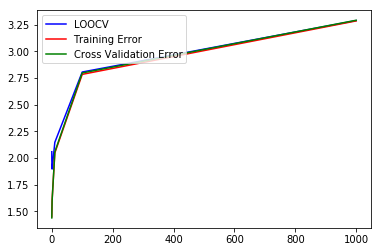

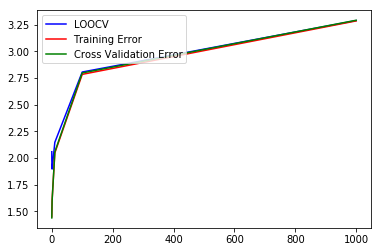

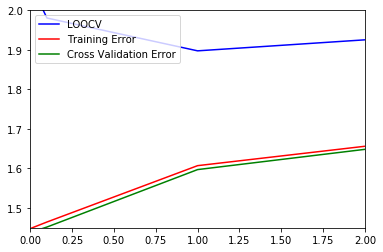

In [200]:
# from matplotlib import pyplot as plt

# import pylab
# pylab.plot(loop, np.array(l_Kfold), '-b', label='LOOCV')
# pylab.plot(loop, np.array(l_TE), '-r', label='Training Error')
# pylab.plot(loop, np.array(l_CE), '-g', label='Cross Validation Error')
# pylab.legend(loc='upper left')
# pylab.show()


# plt.plot(loop, np.array(l_Kfold), '-b', label='LOOCV')
# plt.plot(loop, np.array(l_TE), '-r', label='Training Error')
# plt.plot(loop, np.array(l_CE), '-g', label='Cross Validation Error')
# plt.legend(loc='upper left')
# # pylab.xlim(0, 2.0)
# # pylab.ylim(1.45, 2.0)
# plt.show()

# plt.plot(loop, np.array(l_Kfold), '-b', label='LOOCV')
# plt.plot(loop, np.array(l_TE), '-r', label='Training Error')
# plt.plot(loop, np.array(l_CE), '-g', label='Cross Validation Error')
# plt.legend(loc='upper left')
# pylab.xlim(0, 2.0)
# pylab.ylim(1.45, 2.0)
# plt.show()

# fig, ax = plt.subplots()
# ax.plot(loop, l_Kfold, 'k--', label='LOOCV')
# ax.plot(loop, l_TE, 'k:', label='Training Error')
# ax.plot(loop, l_CE, 'k', label='Cross Validation Error')
# legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')
# plot.show()


# plt.figure(1)
# plt.plot(loop,l_Kfold)
# plt.xlabel('Lambda')
# plt.ylabel('Mean')
# plt.title('Mean of max(x1,x2)-x1')
# plt.show()

# plt.figure(2)
# plt.plot(loop,l_V)
# plt.xlabel('No of Samples')
# plt.ylabel('Variance')
# plt.title('Variance of max(x1,x2)-x1')
# plt.show()

# plt.figure(3)
# plt.plot(loop,l_C)
# plt.xlabel('No of Samples')
# plt.ylabel('Covariance(W,X1)')
# plt.title('Covariance of max(x1,x2)-x1,x1')
# plt.show()

# plt.figure(4)
# plt.plot(K,l_E)
# plt.xlabel('No of Samples')
# plt.ylabel('Entropy')
# plt.title('Entropy with sc.entropy(p_data,base=2)')
# plt.show()


# plt.figure(5)
# plt.plot(K,l_G)
# plt.xlabel('No of Samples')
# plt.ylabel('Entropy with respect to log2')
# plt.title('Entropy sum of p*log2(p)')
# plt.show()


In [ ]:
# Z = transpose(X(:,2:end));
# Y_b = Y(:,2:end);
# K=size(Z);
# K=K(1,1);
# N=size(Y);
# N=N(1,1);
Z=Normalize(Z);
# % Normalization of Train data samples
# one_n=ones(1,N);

[Z;one_n];
# I_k=eye(K);
# zero_k=zeros(K,1);
# zero_t=transpose(zeros(K,1));

# I_b=[I_k,zero_k;zero_t,0];
X_p=X_b*transpose(X_b);
d=X_b*Y_b;
l_M=[];
VD = csvread('/Users/sriramreddy/Downloads/ML/2/valData.csv',0,0);
VD = transpose(VD(:,2:end));
VD=Normalize(VD); 
% Normalization of Validation data samples
kill = size(VD);
kill = kill(1,2);
one_n=ones(1,kill);
VD_b=[VD;one_n];
VL = csvread('/Users/sriramreddy/Downloads/ML/2/valLabels.csv',0,0);
VL = VL(:,2:end);
TD = csvread('/Users/sriramreddy/Downloads/ML/2/testData.csv',0,0);
TD = transpose(TD(:,2:end));
TD = Normalize(TD);
% Normalization of Test data samples
kill = size(TD);
kill = kill(1,2);
one_n=ones(1,kill);
TD_b=[TD;one_n];
l_TE=[];
l_CE=[];
l_Kfold=[];
for lambda= [0.8]
%     [0.01, 0.1, 1, 10, 100,200,300,400,500,800, 1000,10000]
%     linspace(0.5,0.7,10)
%     [0.01, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
%     [0.01, 0.1, 1, 10, 100, 1000]
%     lambda=[0.01,0.05,0.1,0.2,0.3,0.4,0.5,1,1.5,2,4,6,8,10, 100, 1000]
%     [0.01,0.05,0.1,0.5,1,2,4,6,8,10, 100, 1000]
% [0.01, 0.1, 1, 10, 100, 1000]
    C=X_p + lambda*I_b;
    Cat=pinv(C);
    w=Cat*d;
    [error]=LOOCV_final(w,Cat,X_b,Y_b);
    l_Kfold=[l_Kfold,error];
%     I can check the error fast.
    Training_error = RMSE(w,X_b,Y_b);
    l_TE=[l_TE,Training_error];
    Crossvalidation_error = RMSE(w,VD_b,VL);
    l_CE=[l_CE,Crossvalidation_error];
end
% K=[0.01,0.05,0.1,0.5,1,2,4,6,8,10,100,1000,10000];
K= [0.8];
% [0.01, 0.1, 1, 10, 100, 1000,10000];
train__error = transpose(w)*X_b - transpose(Y_b);
sse = train__error*transpose(train__error)
regularization=transpose(w)*w
objective_function = sse + regularization
disp("Objective function")
disp(objective_function)
disp("Sum of square error")
disp(sse)
disp("Regularization term")
disp(regularization)
csvwrite('/Users/sriramreddy/Downloads/ML/2/Output_all_0.8normal_lambda.csv',transpose(w)*TD_b)
% K=[0.01,0.05,0.1,0.2,0.3,0.4,0.5,1,1.5,2,4,6,8,10, 100, 1000];
% csvwrite('/Users/sriramreddy/Downloads/ML/2/w_lambda_normalization_1.csv',w)
figure(1);
plot(K,l_TE,'r.-');
xlabel('LAMBDA');
ylabel('TRAINING_ERROR(RED),CV_ERROR(GREEN),LOOCV_RMS_ERROR(BLUE)');
title('ERROR');
hold on;
plot(K,l_CE,'g.-');
hold on;
plot(K,l_Kfold,'b.-');
legend('TRAINING_ERROR','CV_ERROR','LOOCV_RMS_ERROR');
% legend('TRAINING_ERROR','CV_ERROR','LOOCV_ERROR');
grid;